# Explolatory Data Analysis For Financial inclusion in Africa Dataset

# Understand The Problem Statement
Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other finance services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this Dataset is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

Data source available in the the zindi platform, Zindi Africa

# Type of the Problem

It is a classification problem where we have to predict whether individuals are most likely to have or use a bank account or not.In a classification problem, we have to predict discrete values based on a given set of independent variable.

# Hypothesis Generation
This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which I think can affect the chance for a person to have a bank account

People who have mobile phone have lower chance to use bank account because of mobile money services.

People who are employed have a higher chance of having a bank account than People who are unemployed.

People with low education have low chance to have bank account

People in rural areas have low chance to have bank account

People who have age below 18 have low chance to have bank account

Female have less chance to have bank account

# Load python packages

In [1]:
#Importing the neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Dataset

In [2]:
#Loading the dataset
df = pd.read_csv('Train.csv')

In [3]:
#View the dataset
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


# Exploratory Data Analysis

In [4]:
df.shape

(23524, 13)

In [5]:
list(df.columns)

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [7]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [8]:
#checking for missing values
df.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

# Univariate Analysis

We examine each variable Individually for both categorical and numerical features

In [9]:
#get the count of each category in this target variable
df['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

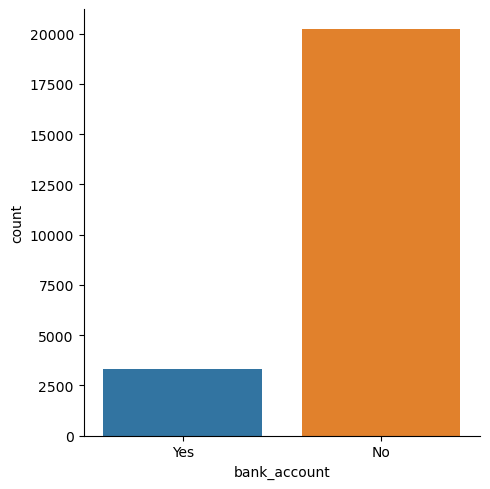

In [24]:
#explore the target distribution
sns.catplot(x='bank_account', kind = 'count', data = df)
plt.show(1)

The data shows we have a large number of no class than yes class which means

majority of people do not have a bank account

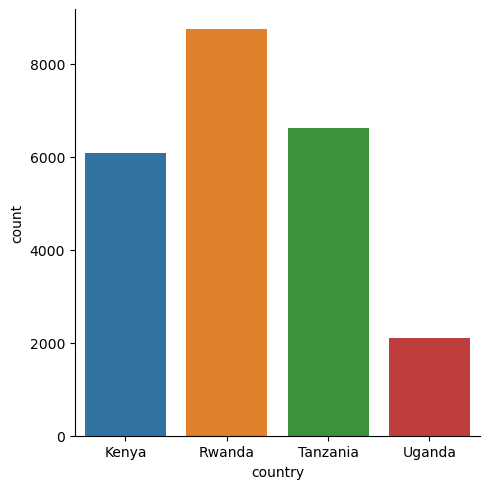

In [25]:
#Explore the country distribution
sns.catplot(x='country', kind='count', data = df)
plt.show(1)

The country feature shows that majority of data was collected from 

Rwanda and fewer of it in Uganda

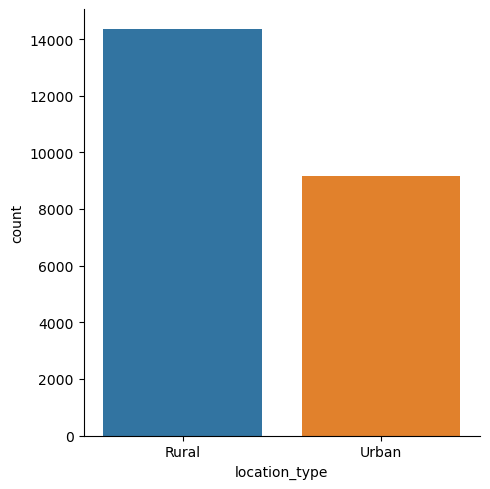

In [26]:
#Explore the location distribution
sns.catplot(x='location_type', kind = 'count', data = df)
plt.show(1)

We see that most people live in rural area than urban

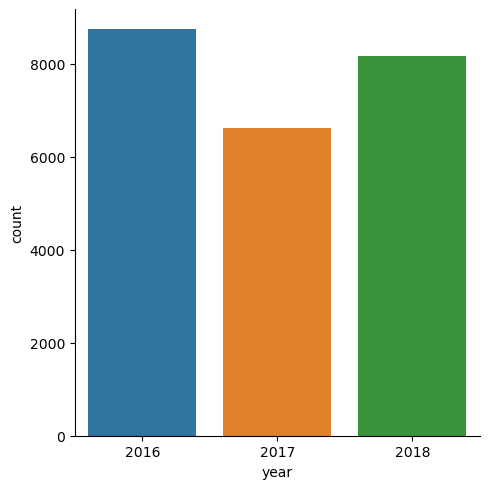

In [27]:
#Explore the years distribution
sns.catplot(x='year', kind ='count', data = df)
plt.show(1)

Most of the data was collected in 2016

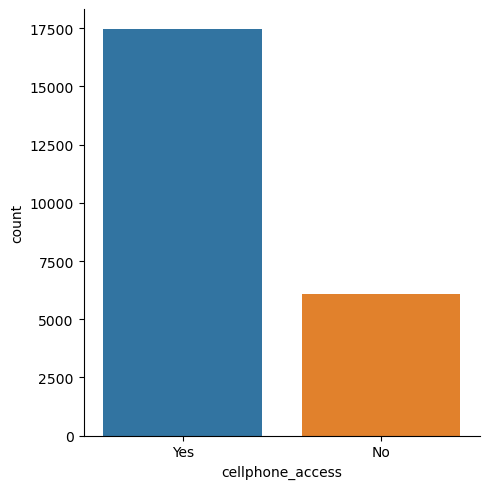

In [28]:
#Explore the cellphone access
sns.catplot(x='cellphone_access', kind='count', data= df)
plt.show(1)

Majority of the respondents have a cellphone

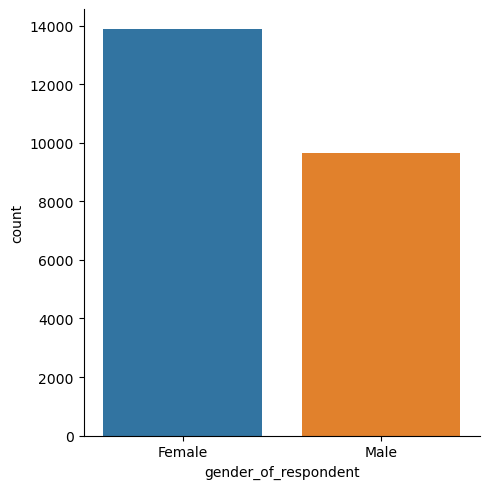

In [29]:
#Explore the gender of respondents distribution
sns.catplot(x='gender_of_respondent', kind='count', data = df)
plt.show(1)

More females than males gave their response

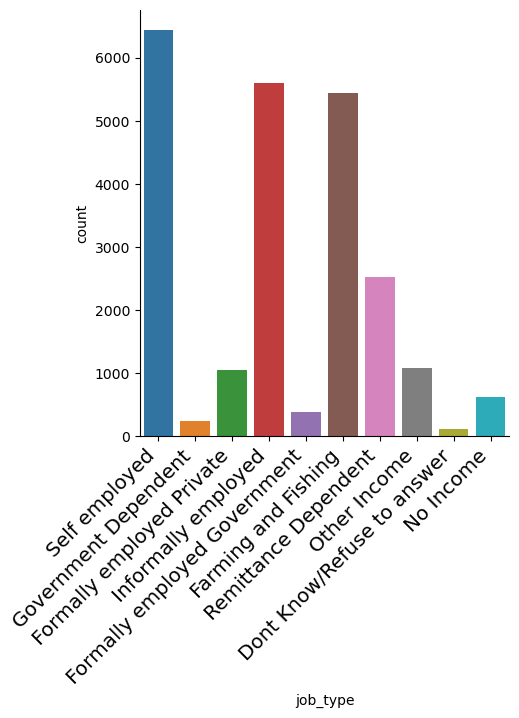

In [34]:
#Explore the job_type description
sns.catplot(x="job_type", kind = "count", data= df);
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show(0)

Majority of the responses in this feature are from self employed people

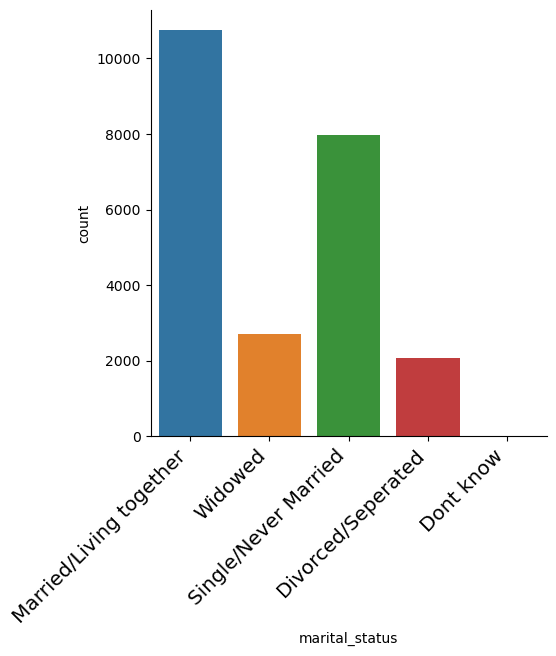

In [37]:
#Explore the marital_status distribution
sns.catplot(x='marital_status', kind ='count', data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show(0)

Most of the respondents are married/living together

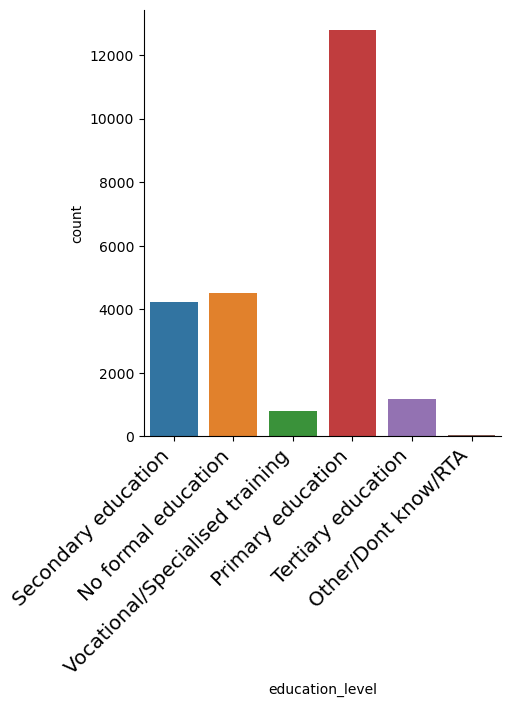

In [39]:
#explore the education level
sns.catplot(x="education_level", kind = "count", data= df);
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show(1)

Most of the participants have primary education

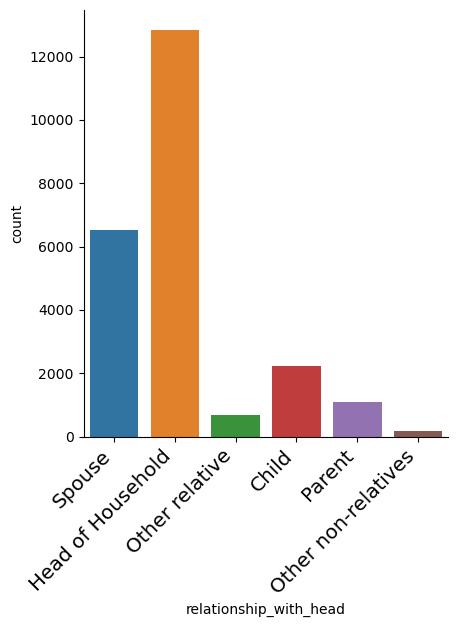

In [40]:
#Explore the relationship with head
sns.catplot(x="relationship_with_head", kind = "count", data= df);
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show(1)

Most of the repsonses came from the head of the household

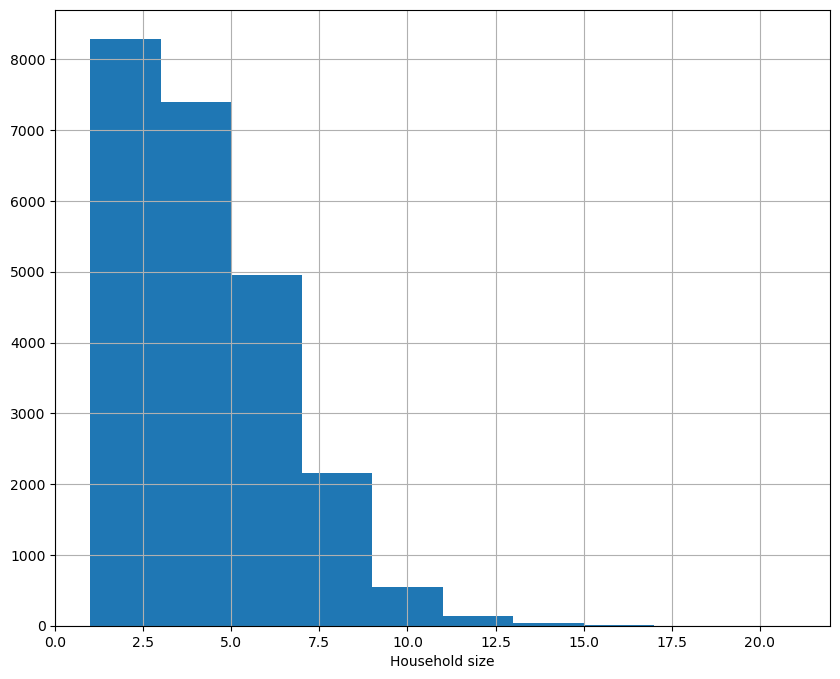

In [45]:
#Explore the household size
plt.figure(figsize=(10,8))
df.household_size.hist()
plt.xlabel('Household size')
plt.show(1)

Majority of the households have 2-3 people

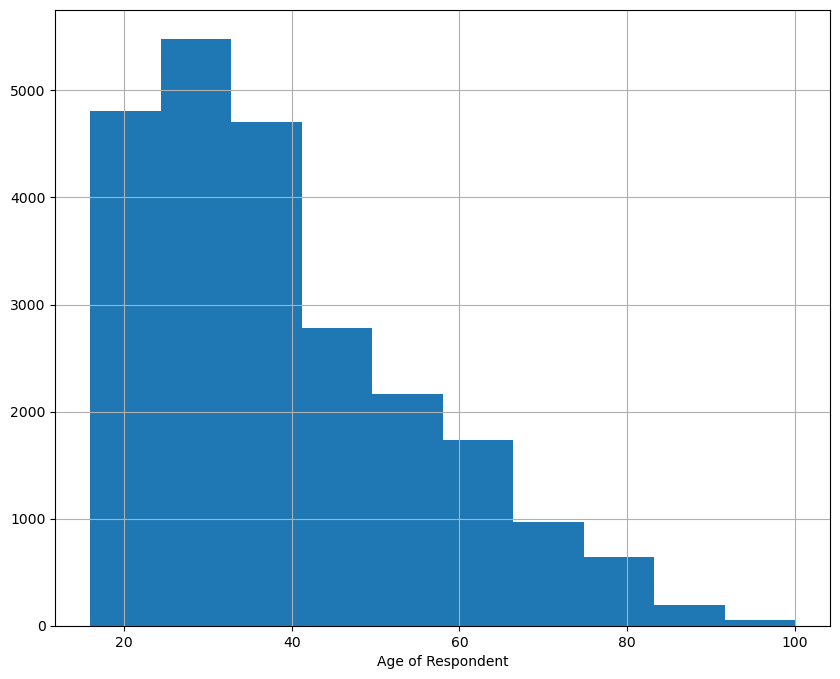

In [46]:
#Explore the age of respondent
plt.figure(figsize=(10,8))
df.age_of_respondent.hist()
plt.xlabel('Age of Respondent')
plt.show(1)

Most of the participants were between age 20 and 25

# Bivariate Analysis

Simultaneous analysis of 2 variables (attributes)

Explores the relationship between the 2 variables

Let's explore now the variables against the target variable

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


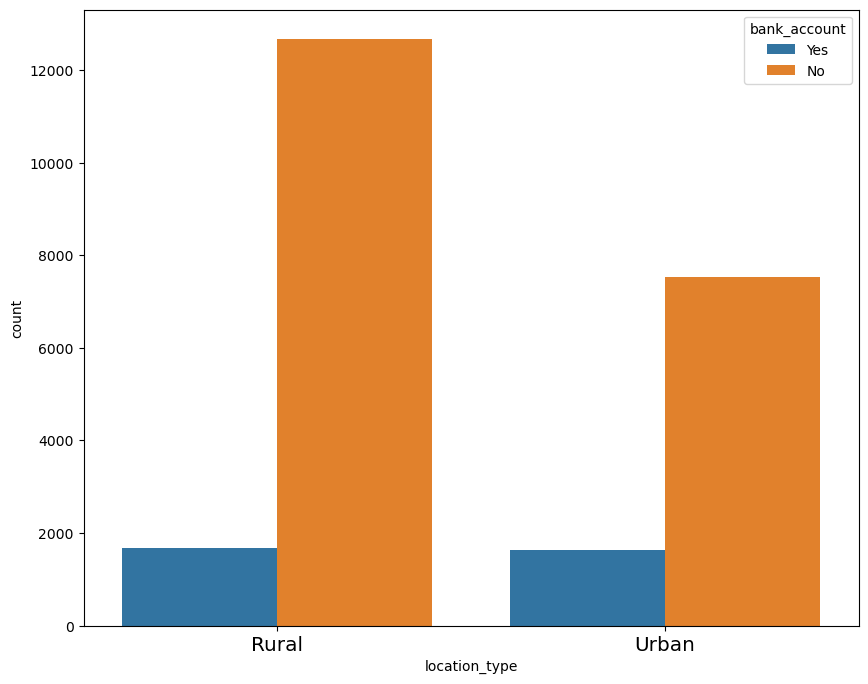

In [48]:
#Explore the location type vs bank account
plt.figure(figsize=(10,8))
sns.countplot('location_type', hue='bank_account', data = df)
plt.xticks(
    fontsize = 'x-large',
    fontweight ='light'
)
plt.show(1)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


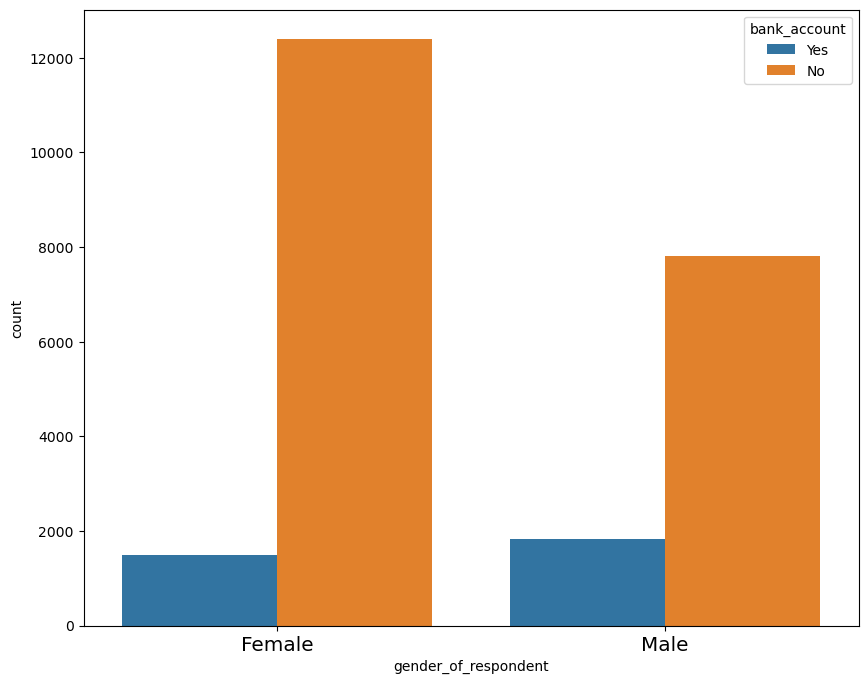

In [49]:
#Explore gender of respondent vs bank account
plt.figure(figsize=(10,8))
sns.countplot('gender_of_respondent', hue='bank_account', data=df)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)
plt.show(1)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


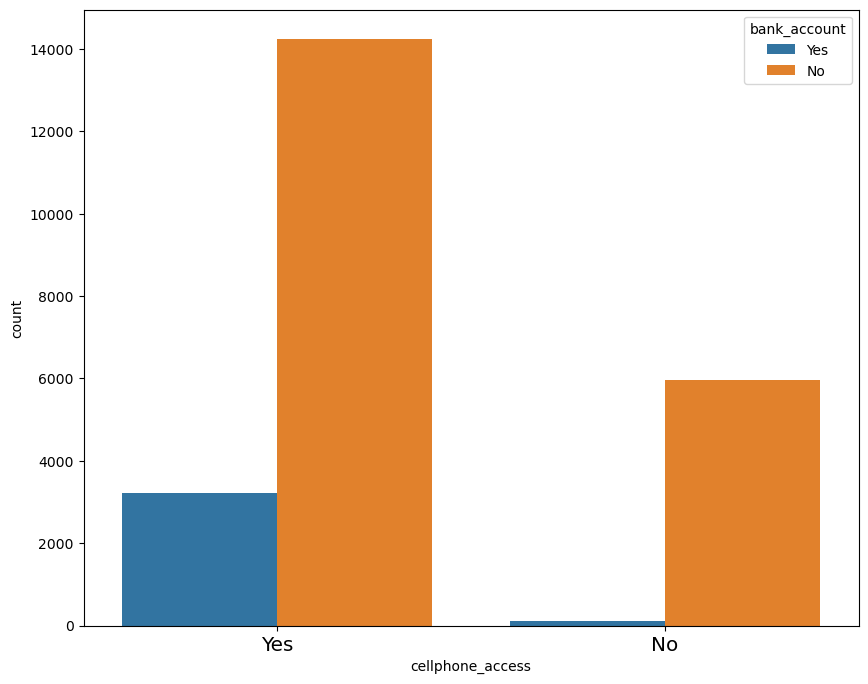

In [50]:
#Explore cellphone access vs bank_Account
plt.figure(figsize=(10,8))
sns.countplot('cellphone_access', hue='bank_account', data=df)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)
plt.show(1)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


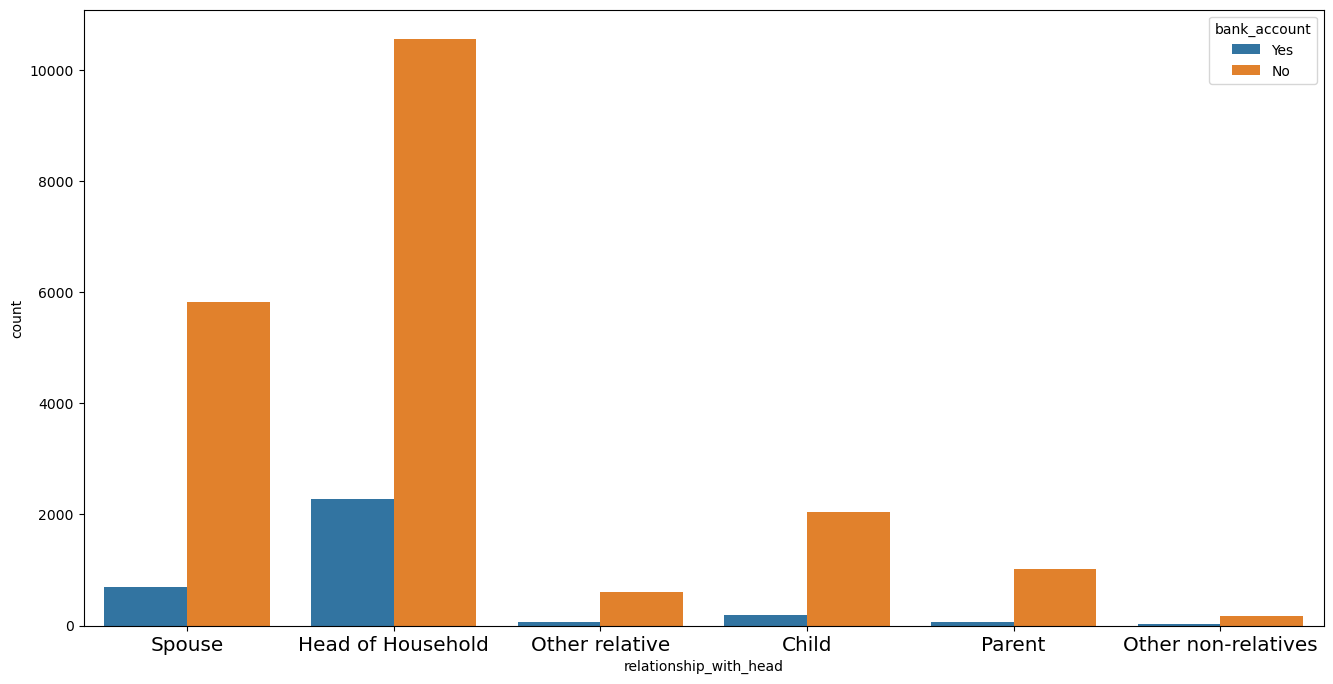

In [53]:
#Explore relationship with head vs bank account
plt.figure(figsize=(16,8))
sns.countplot('relationship_with_head', hue='bank_account', data=df)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)
plt.show(1)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


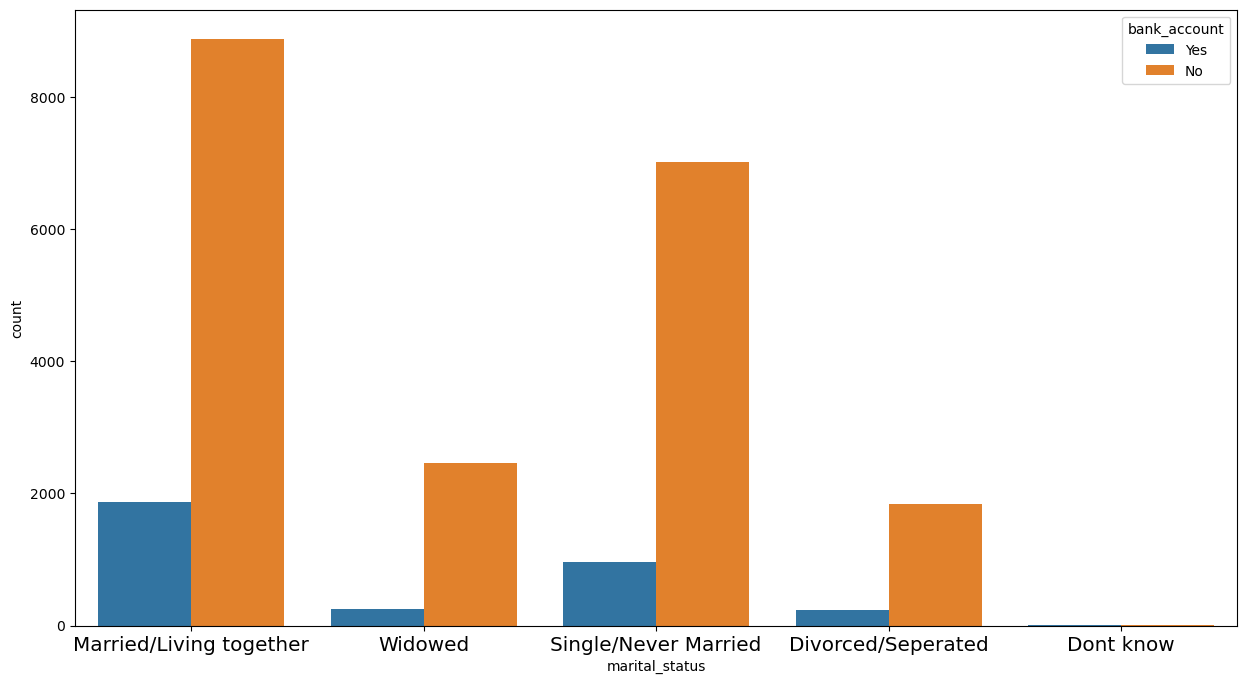

In [55]:
#Explore the marital status vs bank accoutn
plt.figure(figsize=(15,8))
sns.countplot('marital_status', hue='bank_account', data=df)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)
plt.show(1)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


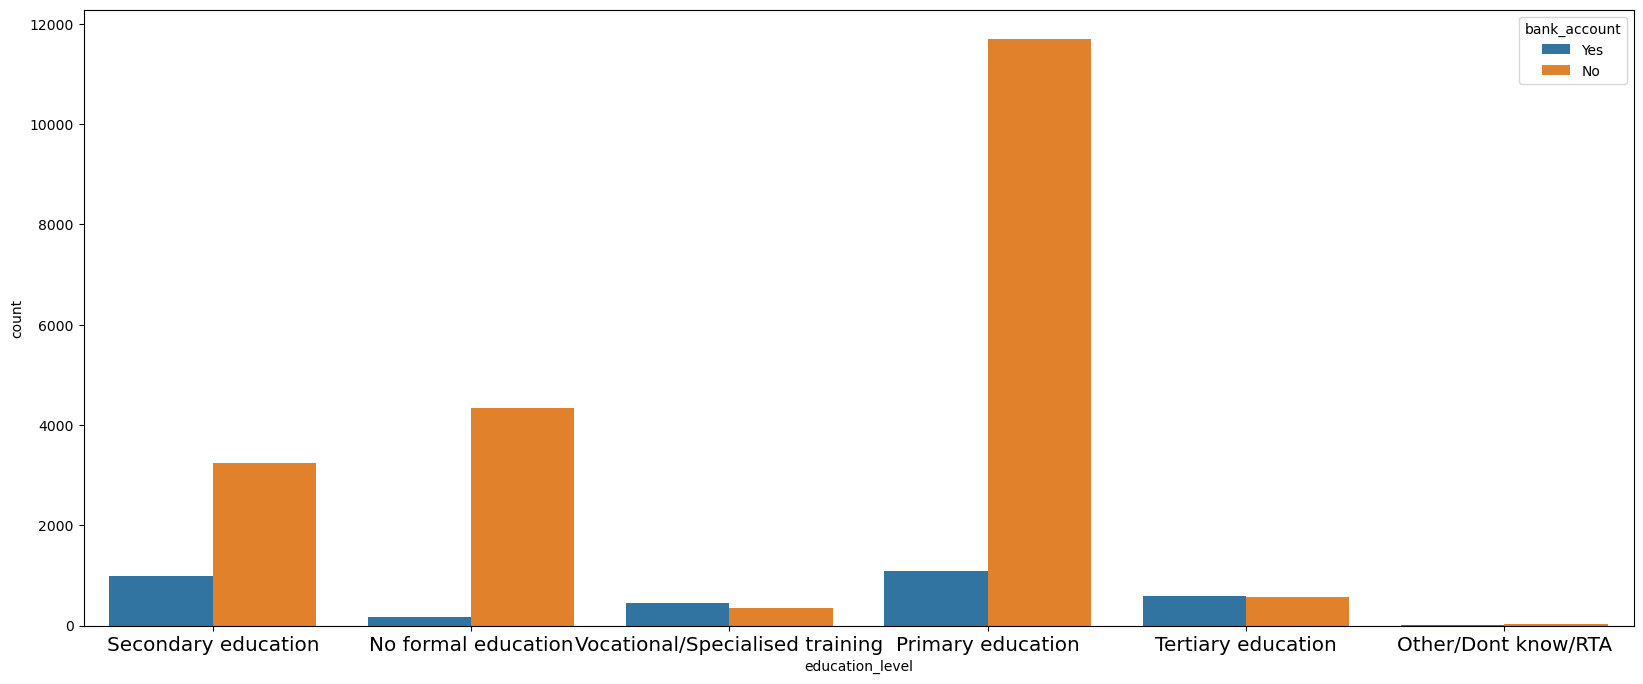

In [61]:
#Explore the education level vs bank account
plt.figure(figsize=(20,8))
sns.countplot('education_level', hue='bank_account', data=df)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)
plt.show(1)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


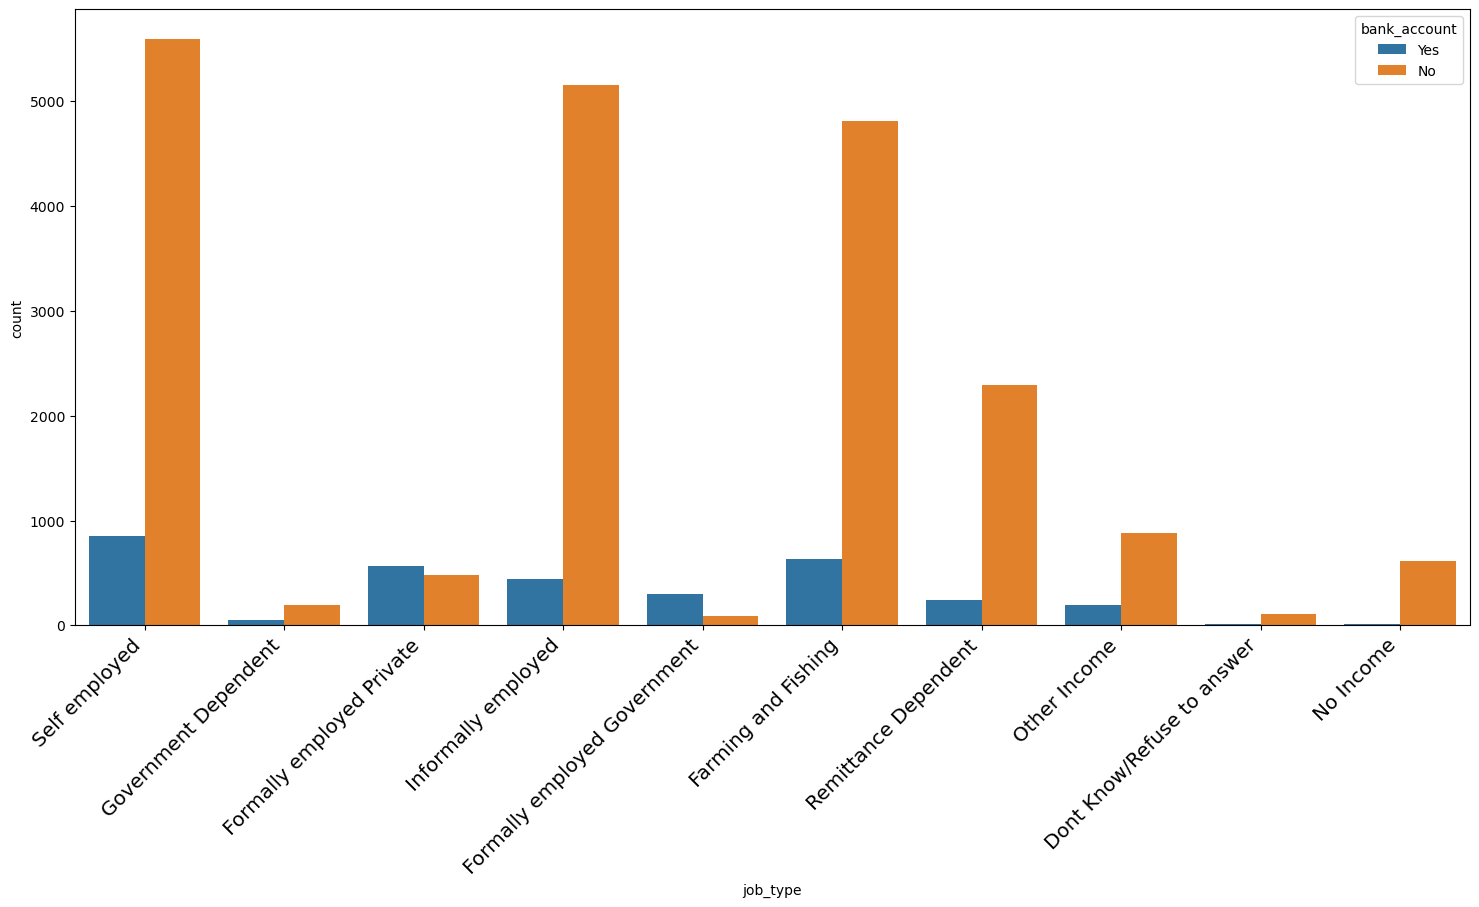

In [69]:
#Explore the job type vs bank account
plt.figure(figsize=(18,8))
sns.countplot('job_type', hue='bank_account', data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show(1)

In [ ]:
Hypothesis results

People who have mobile phones have a lower chance to use bank accounts because of mobile money services. - TRUE
People who are employed have a higher chance of having bank accounts than people who are unemployed.- TRUE
People with low education levels have a low chance to have bank accounts.-TRUE
People in rural areas have a low chance to have bank accounts.-TRUE
Females have less chance to have bank accounts.- TRUE